<a href="https://colab.research.google.com/github/SamarBaghdadi/CodingDojo_DS_V23/blob/new-main-branch/Multivariate_plotting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Multivariate Plots

##Bar Plots
- a categorical feature(x)
- vs. a numeric target(y)

In [2]:
#Imports
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np


In [3]:
#Load the data
fname = "/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/ames-housing-cleaned_eda.csv"
df=pd.read_csv(fname)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 36 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PID               2930 non-null   int64  
 1   MS Zoning         2930 non-null   object 
 2   Lot Frontage      2930 non-null   int64  
 3   Lot Area          2930 non-null   int64  
 4   Street            2930 non-null   object 
 5   Alley             2930 non-null   object 
 6   Utilities         2930 non-null   object 
 7   Neighborhood      2930 non-null   object 
 8   Bldg Type         2930 non-null   object 
 9   House Style       2930 non-null   object 
 10  Overall Qual      2930 non-null   int64  
 11  Overall Cond      2930 non-null   int64  
 12  Year Built        2930 non-null   int64  
 13  Year Remodeled    2930 non-null   int64  
 14  Exter Qual        2930 non-null   object 
 15  Exter Cond        2930 non-null   object 
 16  Bsmt Unf Sqft     2930 non-null   float64


,PID,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Utilities,Neighborhood,Bldg Type,House Style,...,Garage Area,Garage Qual,Garage Cond,Paved Drive,Fence,SalePrice,Month Sold,Year Sold,Total Full Baths,Total Half Bath
0,907227090,RL,60,7200,Pave,MISSING,AllPub,CollgCr,1Fam,1Story,...,297.0,TA,TA,Y,MnPrv,119900.0,3,2006,1.0,0.0
1,527108010,RL,134,19378,Pave,MISSING,AllPub,Gilbert,1Fam,2Story,...,576.0,TA,TA,Y,MISSING,320000.0,3,2006,3.0,1.0
2,534275170,RL,-1,12772,Pave,MISSING,AllPub,NAmes,1Fam,1Story,...,301.0,TA,TA,Y,MISSING,151500.0,4,2007,1.0,0.0
3,528104050,RL,114,14803,Pave,MISSING,AllPub,NridgHt,1Fam,1Story,...,1220.0,TA,TA,Y,MISSING,385000.0,6,2008,3.0,0.0
4,533206070,FV,32,3784,Pave,Pave,AllPub,Somerst,TwnhsE,1Story,...,476.0,TA,TA,Y,MISSING,193800.0,2,2007,3.0,0.0


In [4]:
#What categories are in Bldg Type?
df["Bldg Type"].value_counts()

,count
Bldg Type,
1Fam,2425
TwnhsE,233
Duplex,109
Twnhs,101
2fmCon,62


###Bar Plots with Matplotlib Only

In [9]:
#Use groupby to calculate the average for each category
bldg_type_prices=df.groupby('Bldg Type')['SalePrice'].mean()
bldg_type_prices

,SalePrice
Bldg Type,
1Fam,185589.360825
2fmCon,125581.709677
Duplex,139808.935780
Twnhs,135934.059406
TwnhsE,192311.914163


Text(0.5, 0, 'Building Type')

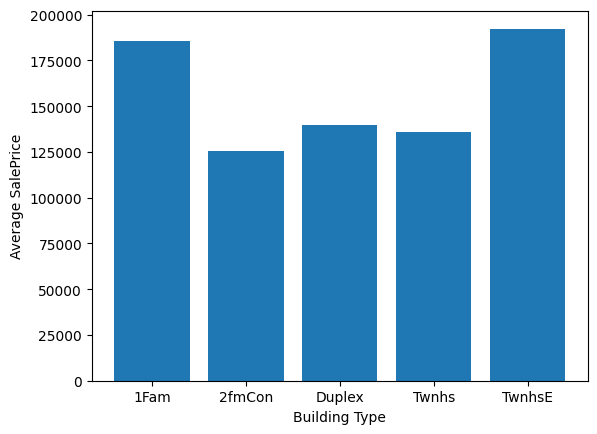

In [10]:
#Plot the average of each as a bar
fig,ax=plt.subplots()
ax.bar(bldg_type_prices.index,bldg_type_prices.values)
ax.set_ylabel("Average SalePrice")
ax.set_xlabel("Building Type")

According to the bar chart, Single Famly Standalone Homes (1Fam) and Townhouse End units have the highest average Sale Price

###Bar Graph Using Pandas

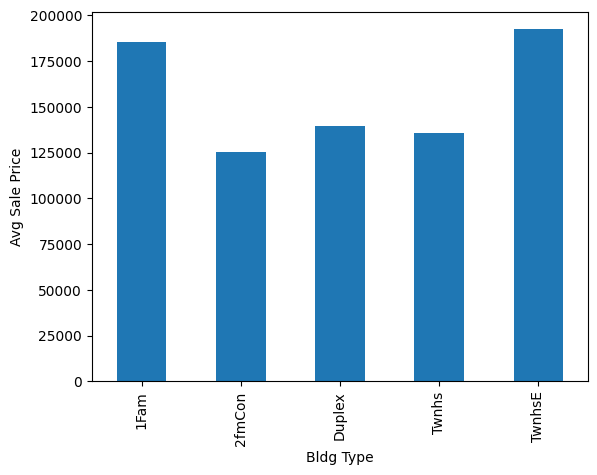

In [13]:
ax=bldg_type_prices.plot(kind="bar")
ax.set_ylabel("Avg Sale Price");

###Bar Graph using Seaborn

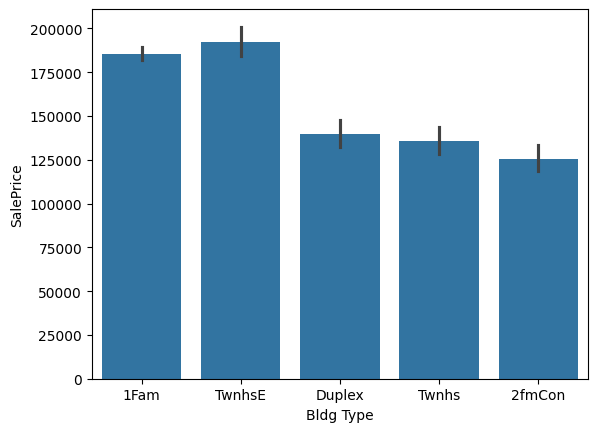

In [14]:
#Using Seaborn to plot the group means
ax=sns.barplot(data=df,x="Bldg Type",y="SalePrice")

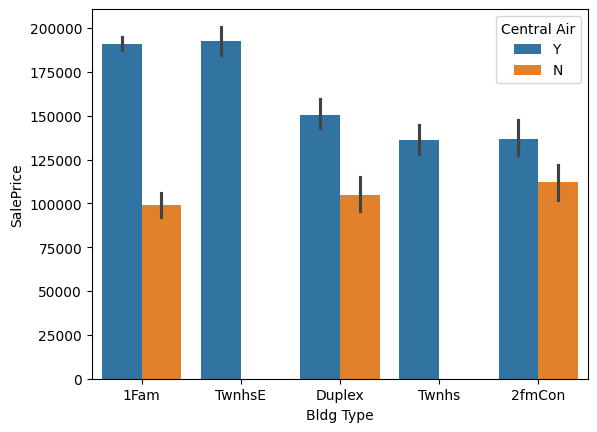

In [25]:
#Using Seaborn to plot the group means by building type cored by central air
ax=sns.barplot(data=df,x="Bldg Type",y="SalePrice",hue='Central Air')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 36 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PID               2930 non-null   int64  
 1   MS Zoning         2930 non-null   object 
 2   Lot Frontage      2930 non-null   int64  
 3   Lot Area          2930 non-null   int64  
 4   Street            2930 non-null   object 
 5   Alley             2930 non-null   object 
 6   Utilities         2930 non-null   object 
 7   Neighborhood      2930 non-null   object 
 8   Bldg Type         2930 non-null   object 
 9   House Style       2930 non-null   object 
 10  Overall Qual      2930 non-null   int64  
 11  Overall Cond      2930 non-null   int64  
 12  Year Built        2930 non-null   int64  
 13  Year Remodeled    2930 non-null   int64  
 14  Exter Qual        2930 non-null   object 
 15  Exter Cond        2930 non-null   object 
 16  Bsmt Unf Sqft     2930 non-null   float64


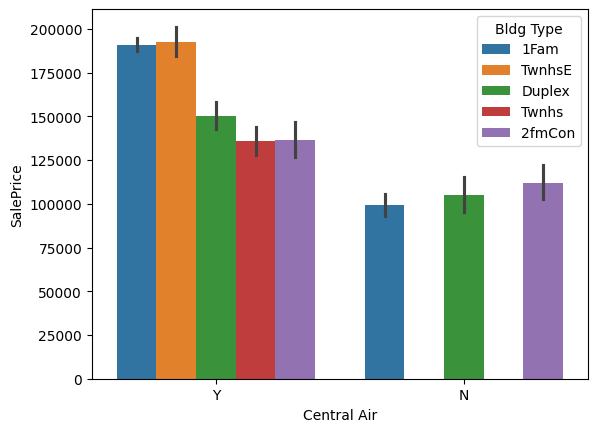

In [28]:
#Using seaborn to plot the group means by central air colored by Bldg Type
ax=sns.barplot(data=df, x="Central Air",y="SalePrice",hue="Bldg Type")

#Correlation and Heat Maps

In [30]:
# Read in data using direct url
athlete_url ="https://docs.google.com/spreadsheets/d/e/2PACX-1vTtqWeFFAV3GA13M4eXdzMkAKAxIQ7fek4kv16wntAI_2QfYzm_BxdW6HVblVHy0VFRwsA47xFn8--6/pub?output=csv"
df1 = pd.read_csv(athlete_url)
df1.info()
df1.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40616 entries, 0 to 40615
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      40616 non-null  int64  
 1   Age     39143 non-null  float64
 2   Height  31615 non-null  float64
 3   Team    40616 non-null  object 
 4   NOC     40616 non-null  object 
 5   Games   40616 non-null  object 
 6   Year    40616 non-null  int64  
 7   Season  40616 non-null  object 
 8   City    40616 non-null  object 
 9   Sport   40616 non-null  object 
 10  Event   40616 non-null  object 
 11  Medal   5917 non-null   object 
dtypes: float64(2), int64(2), object(8)
memory usage: 3.7+ MB


,ID,Age,Height,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,5,21.0,185.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
1,5,21.0,185.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
2,5,25.0,185.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
3,5,25.0,185.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
4,5,27.0,185.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN


In [34]:
#Get Correlations
corr=df1.corr(numeric_only=True)
corr.round(2)

,ID,Age,Height,Year
ID,1.00,0.00,-0.01,0.01
Age,0.00,1.00,0.15,-0.13
Height,-0.01,0.15,1.00,0.05
Year,0.01,-0.13,0.05,1.00


<Axes: >

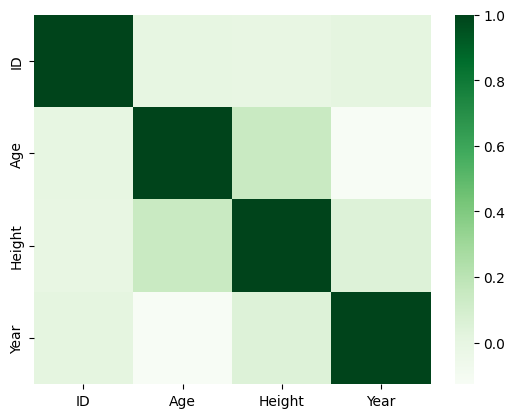

In [40]:
sns.heatmap(corr,cmap='Greens')

<Axes: >

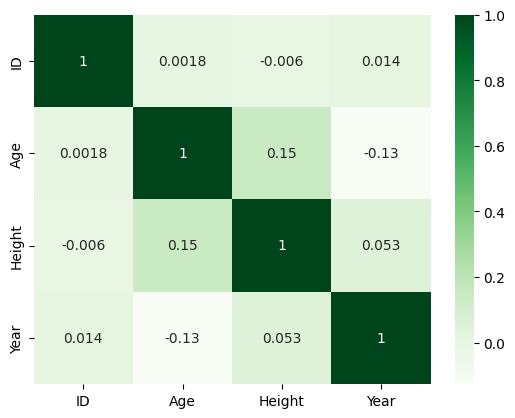

In [41]:
#Include annotations on the heatmap
sns.heatmap(corr,cmap="Greens",annot=True)

In [42]:
corr=df.corr(numeric_only=True)
corr.round(2)

,PID,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remodeled,Bsmt Unf Sqft,Total Bsmnt Sqft,Living Area Sqft,...,Kitchen,Total Rooms,Garage Yr Blt,Garage Cars,Garage Area,SalePrice,Month Sold,Year Sold,Total Full Baths,Total Half Bath
PID,1.00,-0.04,0.03,-0.26,0.10,-0.34,-0.16,-0.09,-0.19,-0.11,...,0.08,-0.07,-0.16,-0.24,-0.21,-0.22,-0.05,0.01,-0.15,0.03
Lot Frontage,-0.04,1.00,0.13,0.13,-0.03,0.03,0.07,0.14,0.21,0.18,...,0.02,0.20,0.01,0.14,0.18,0.18,0.02,-0.01,0.07,-0.03
Lot Area,0.03,0.13,1.00,0.10,-0.03,0.02,0.02,0.02,0.25,0.29,...,-0.02,0.22,0.07,0.18,0.21,0.24,0.00,-0.02,0.18,-0.01
Overall Qual,-0.26,0.13,0.10,1.00,-0.09,0.60,0.57,0.27,0.55,0.57,...,-0.16,0.38,0.28,0.60,0.56,0.73,0.03,-0.02,0.50,0.00
Overall Cond,0.10,-0.03,-0.03,-0.09,1.00,-0.37,0.05,-0.14,-0.17,-0.12,...,-0.09,-0.09,0.02,-0.18,-0.15,-0.10,-0.01,0.03,-0.19,-0.04
Year Built,-0.34,0.03,0.02,0.60,-0.37,1.00,0.61,0.13,0.41,0.24,...,-0.14,0.11,0.26,0.54,0.48,0.51,0.01,-0.01,0.49,0.00
Year Remodeled,-0.16,0.07,0.02,0.57,0.05,0.61,1.00,0.16,0.30,0.32,...,-0.14,0.20,0.14,0.43,0.38,0.48,0.02,0.03,0.43,0.01
Bsmt Unf Sqft,-0.09,0.14,0.02,0.27,-0.14,0.13,0.16,1.00,0.41,0.24,...,0.07,0.25,0.01,0.18,0.16,0.17,0.02,-0.04,-0.08,-0.00
Total Bsmnt Sqft,-0.19,0.21,0.25,0.55,-0.17,0.41,0.30,0.41,1.00,0.44,...,-0.04,0.28,0.16,0.44,0.49,0.58,0.02,-0.01,0.47,-0.01
Living Area Sqft,-0.11,0.18,0.29,0.57,-0.12,0.24,0.32,0.24,0.44,1.00,...,0.12,0.81,0.14,0.49,0.48,0.64,0.04,-0.03,0.50,-0.01


<Axes: >

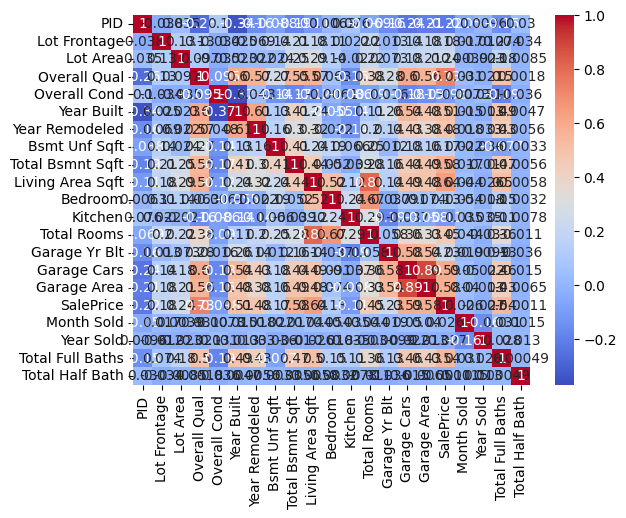

In [48]:
#Make heatmap of correlations
sns.heatmap(corr,cmap="coolwarm",annot=True)

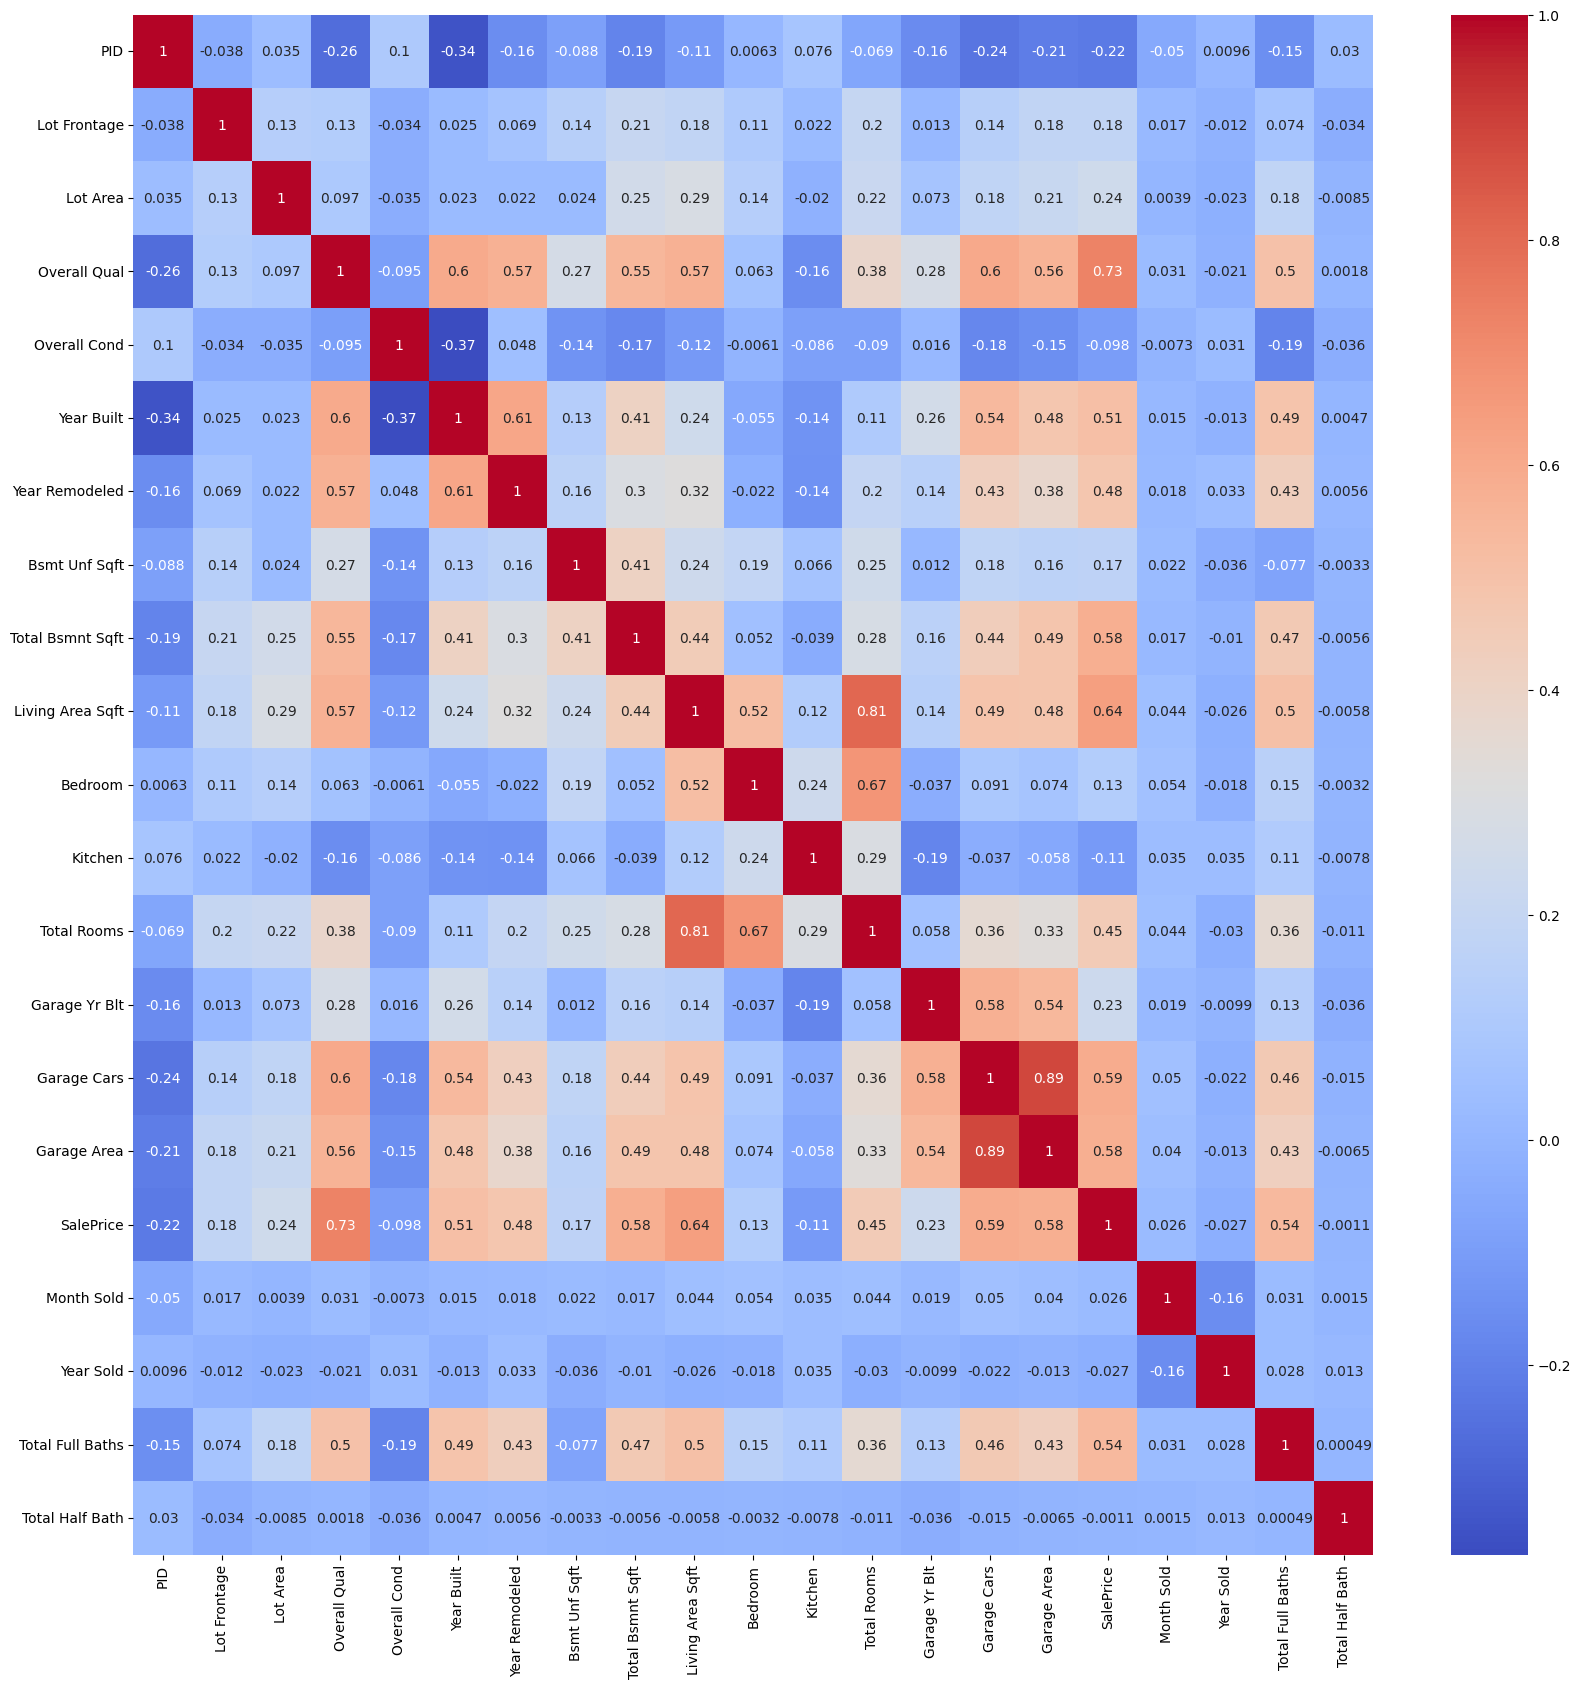

In [49]:
#Create a fig, ax with figsize argument
fig,ax=plt.subplots(figsize=(20,20))
sns.heatmap(corr,cmap='coolwarm',annot=True,ax=ax);

#Regression Plots

- A numeric feature (X)
- vs. a numeric target (Y)

In [50]:
df=df.set_index("PID")
df.head()

,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Utilities,Neighborhood,Bldg Type,House Style,Overall Qual,...,Garage Area,Garage Qual,Garage Cond,Paved Drive,Fence,SalePrice,Month Sold,Year Sold,Total Full Baths,Total Half Bath
PID,,,,,,,,,,,,,,,,,,,,,
907227090,RL,60,7200,Pave,MISSING,AllPub,CollgCr,1Fam,1Story,5,...,297.0,TA,TA,Y,MnPrv,119900.0,3,2006,1.0,0.0
527108010,RL,134,19378,Pave,MISSING,AllPub,Gilbert,1Fam,2Story,7,...,576.0,TA,TA,Y,MISSING,320000.0,3,2006,3.0,1.0
534275170,RL,-1,12772,Pave,MISSING,AllPub,NAmes,1Fam,1Story,6,...,301.0,TA,TA,Y,MISSING,151500.0,4,2007,1.0,0.0
528104050,RL,114,14803,Pave,MISSING,AllPub,NridgHt,1Fam,1Story,10,...,1220.0,TA,TA,Y,MISSING,385000.0,6,2008,3.0,0.0
533206070,FV,32,3784,Pave,Pave,AllPub,Somerst,TwnhsE,1Story,8,...,476.0,TA,TA,Y,MISSING,193800.0,2,2007,3.0,0.0


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2930 entries, 907227090 to 902201120
Data columns (total 35 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MS Zoning         2930 non-null   object 
 1   Lot Frontage      2930 non-null   int64  
 2   Lot Area          2930 non-null   int64  
 3   Street            2930 non-null   object 
 4   Alley             2930 non-null   object 
 5   Utilities         2930 non-null   object 
 6   Neighborhood      2930 non-null   object 
 7   Bldg Type         2930 non-null   object 
 8   House Style       2930 non-null   object 
 9   Overall Qual      2930 non-null   int64  
 10  Overall Cond      2930 non-null   int64  
 11  Year Built        2930 non-null   int64  
 12  Year Remodeled    2930 non-null   int64  
 13  Exter Qual        2930 non-null   object 
 14  Exter Cond        2930 non-null   object 
 15  Bsmt Unf Sqft     2930 non-null   float64
 16  Total Bsmnt Sqft  2930 non-null   

#Scatter Plot

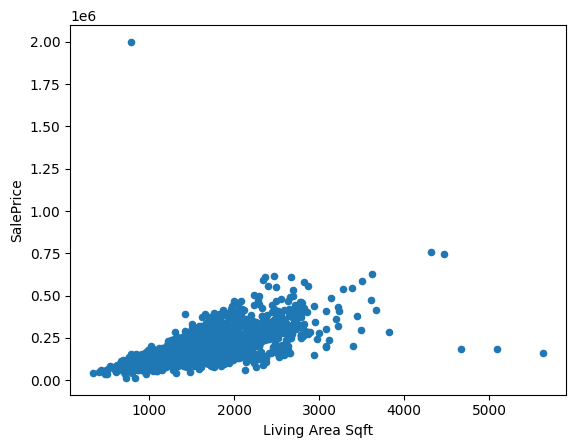

In [60]:
#We can make a scatter plot with pandas' .plot
ax=df.plot(kind='scatter',x='Living Area Sqft',y='SalePrice');

[Text(0.5, 0, 'Living Area Sqft'), Text(0, 0.5, 'SalePrice')]

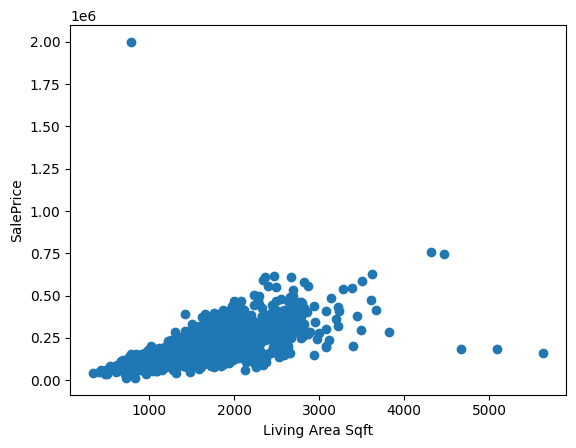

In [61]:
# Scatter Plot with Matplotlib
fig, ax =plt.subplots()
ax.scatter(df['Living Area Sqft'],df["SalePrice"])
ax.set(xlabel='Living Area Sqft',ylabel='SalePrice')

<ipython-input-64-f8d22b6cd6dc>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax=sns.scatterplot(data=df, x="Living Area Sqft",y="SalePrice",palette="coldwarm")


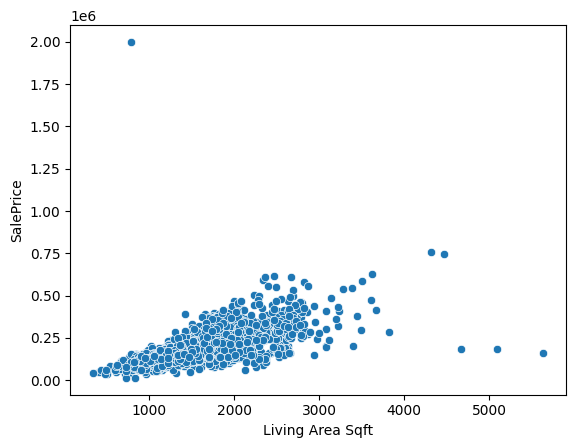

In [64]:
#Scatter with seaborn
ax=sns.scatterplot(data=df, x="Living Area Sqft",y="SalePrice",)

#Seaborn Regplot
- Create a scatter plot with Matplotlib
- Calculate a line of best fit using another package ( either statsmodels or SciPy...)
- it will plot the trend line using Matplotlib

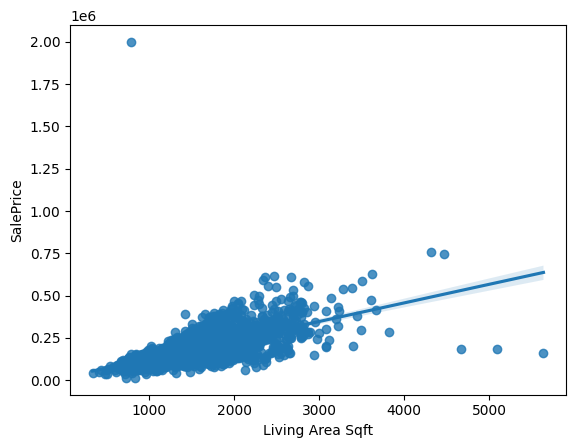

In [65]:
ax=sns.regplot(data=df,x="Living Area Sqft",y='SalePrice')

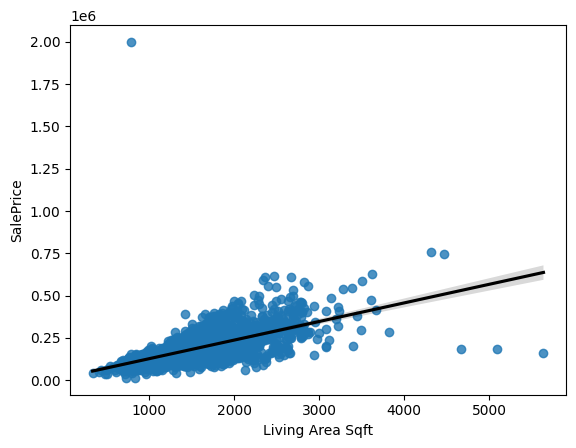

In [66]:
#Saving the arguments for the line color in a dict to use as line_kws
line_kws=dict(color='black')
ax=sns.regplot(data=df,x="Living Area Sqft",y="SalePrice",line_kws=line_kws)

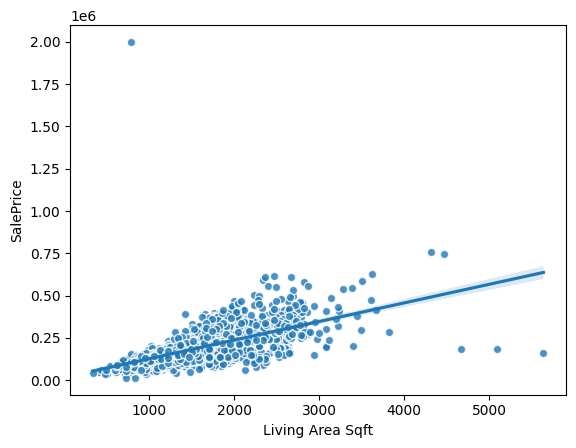

In [75]:
#Saving the arguments for the markers'edge color in a dict to use as scatter_kws
scatter_kws=dict(edgecolor="white")
ax=sns.regplot(data=df,x="Living Area Sqft",y="SalePrice",scatter_kws=scatter_kws)

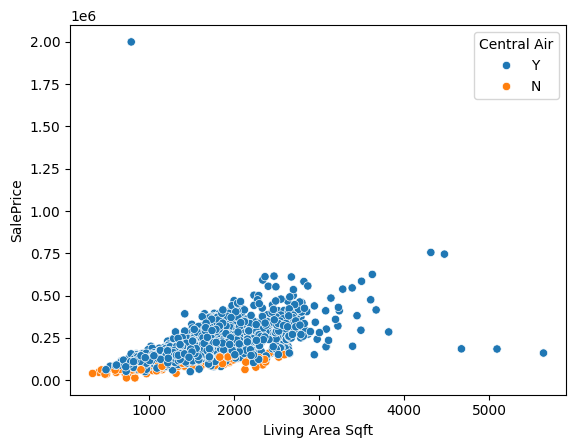

In [72]:
# Creating a scatterplot using Central Air as the hue argument
ax=sns.scatterplot(data=df,x='Living Area Sqft',y='SalePrice',hue='Central Air');

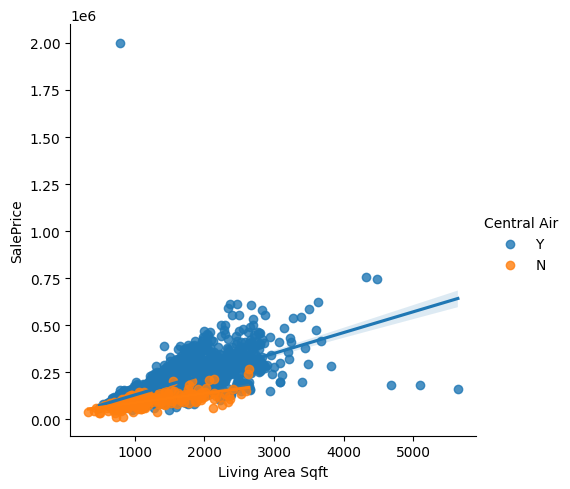

In [73]:
# Use sns.lmplot and save as g
g=sns.lmplot(data=df,x="Living Area Sqft",y="SalePrice", hue="Central Air");

Text(0.5, 1.0, 'LM Plot')

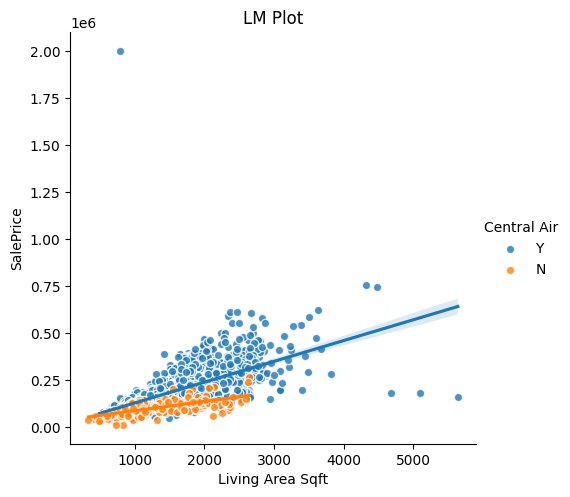

In [78]:
# Adding back the scatter_kws
g=sns.lmplot(data=df,x="Living Area Sqft",y="SalePrice",hue="Central Air",scatter_kws=scatter_kws)
g.ax.set_title("LM Plot")

In [77]:
#what is the output of the lmplot
type(g)

seaborn.axisgrid.FacetGrid

#Multivariate Categorical Plots
- Categorical Features (X) vs. a Numeric Target (y)
- Categorical Features (X) vs. a Categorical Target (y)

In [79]:
# Checking how many categories in each categorical column
df.select_dtypes('object').nunique()

,0
MS Zoning,7
Street,2
Alley,3
Utilities,3
Neighborhood,28
Bldg Type,5
House Style,8
Exter Qual,4
Exter Cond,5
Central Air,2


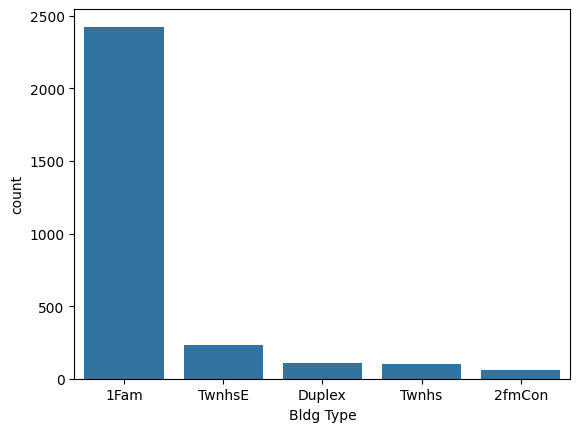

In [80]:
#Univariate countplot
ax=sns.countplot(data=df, x='Bldg Type')

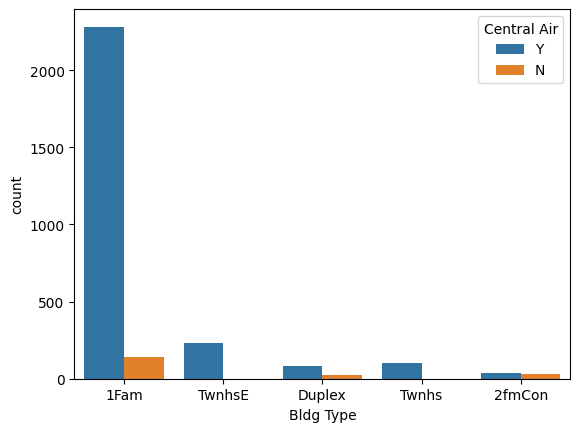

In [81]:
# Multivariate countplot with a hue argument
ax=sns.countplot(data=df,x="Bldg Type",hue="Central Air")

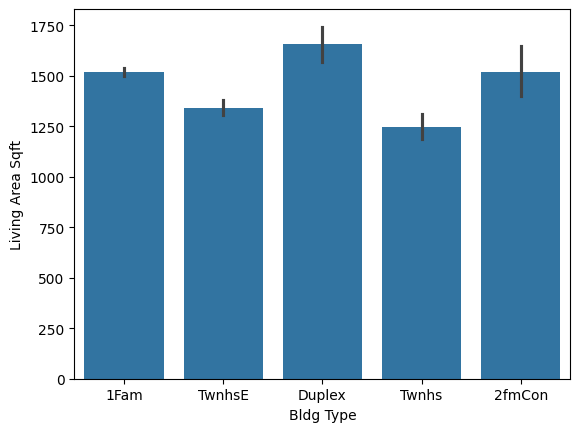

In [82]:
#Making a seaborn barplot as a starting point
ax=sns.barplot(data=df,x="Bldg Type",y="Living Area Sqft")

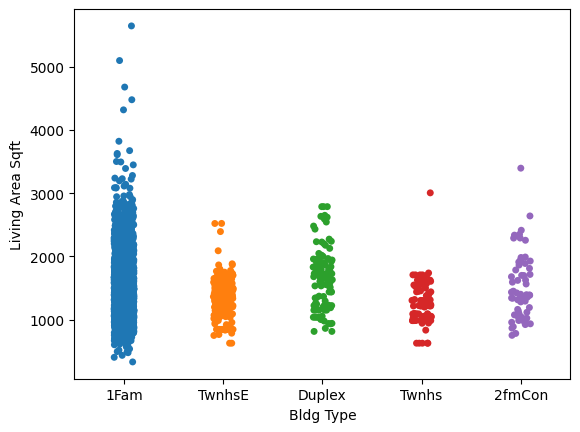

In [83]:
#seaborn Stripplot takes the same arguments as barplot
ax=sns.stripplot(data=df,x='Bldg Type',y='Living Area Sqft',hue='Bldg Type')

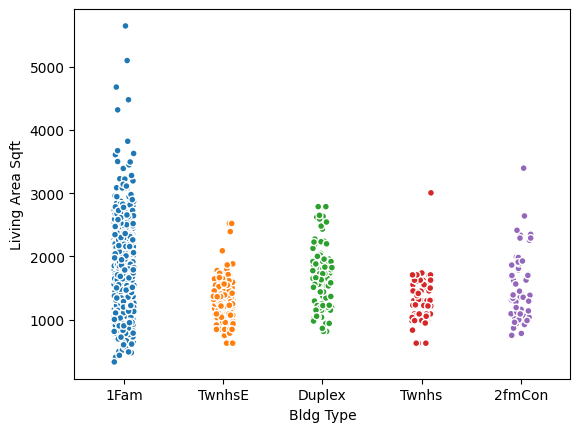

In [88]:
#Customizing the stripplot
ax=sns.stripplot(data=df,x="Bldg Type",y='Living Area Sqft',hue="Bldg Type",edgecolor='white',linewidth=1)

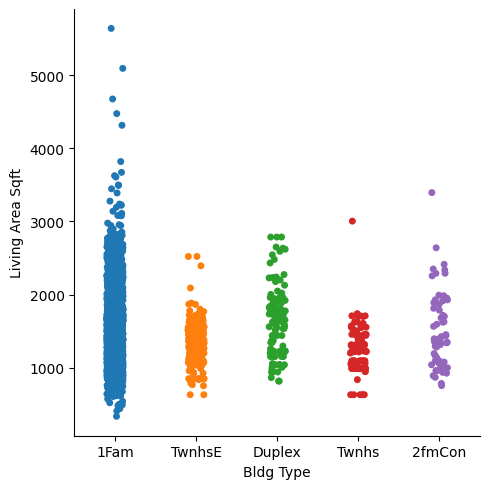

In [89]:
#seaborn Catplot with default kind is stripplot
g=sns.catplot(data=df, x="Bldg Type",y='Living Area Sqft',hue="Bldg Type")

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 87.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 50.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 5.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 21.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 89.3% of the points cannot be place

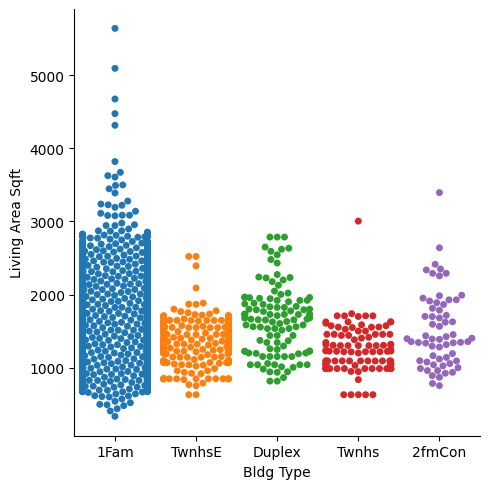

In [90]:
#Using catplot to make a swarmplot
g=sns.catplot(data=df,x="Bldg Type", y="Living Area Sqft", hue='Bldg Type',kind='swarm')

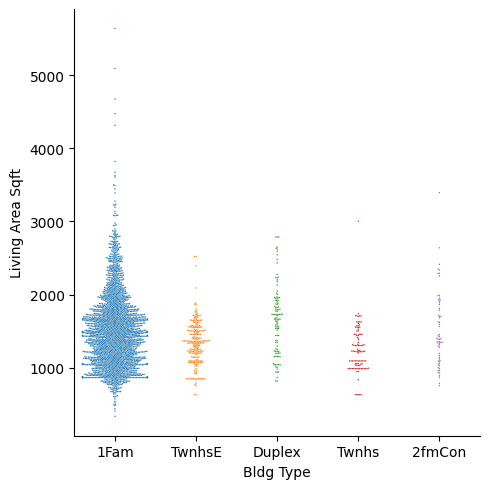

In [91]:
#Using catplot to make a swarmplot, include size argument s=1
g=sns.catplot(data=df,x="Bldg Type",y='Living Area Sqft',hue='Bldg Type', kind='swarm',s=1)

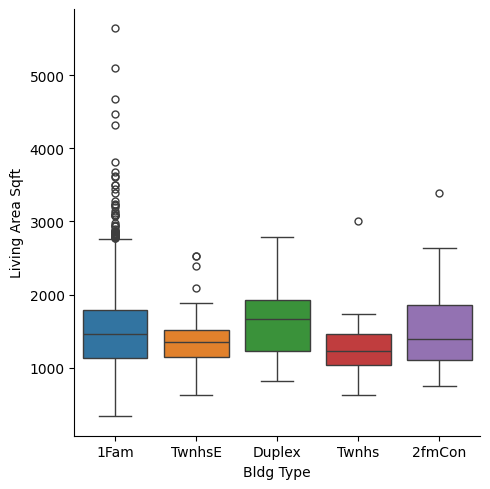

In [94]:
#Using catplot to make a boxplot, include dodge=False to reduce white space
g=sns.catplot(data=df,x="Bldg Type",y='Living Area Sqft',hue='Bldg Type', kind='box',dodge=False)

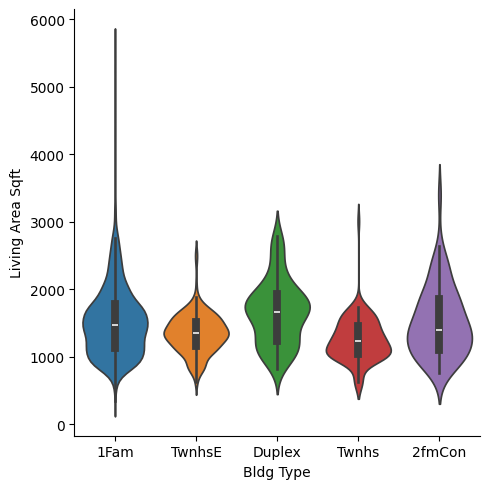

In [95]:
#Using catplot to make a violin plot, include dodge=False to reduce white space between the violins
g=sns.catplot(data=df,x="Bldg Type",y='Living Area Sqft',hue='Bldg Type', kind='violin',dodge=False)

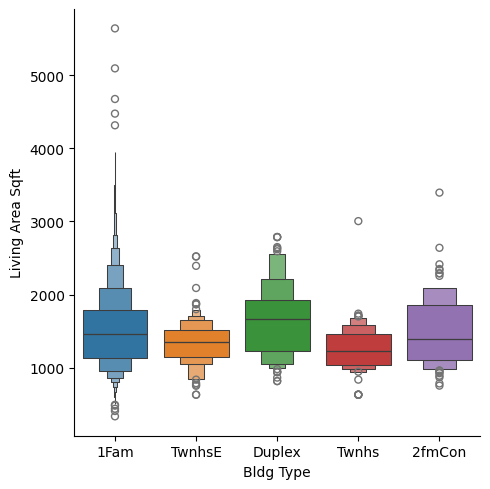

In [96]:
#Using catplot to make a boxen, include dodge=False to reduce white space
g=sns.catplot(data=df,x="Bldg Type",y='Living Area Sqft',hue='Bldg Type', kind='boxen',dodge=False)